## Breast Cancer Prediction

This project has been dedicated to solve the classification problem of Breast cancer. 
We have been given the data of breast cancer. We have to classify it as Bengin or Malignant.



## Importing useful library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import Imputer,StandardScaler

import os 
import pickle
%matplotlib inline
plt.rcParams['font.size']=13


home_directory = [os.getenv("HOME")]
data_directory = [os.sep.join(home_directory+['data'])]
file_name = ['breast_cancer.data']


In [2]:
#Method for reding the data from Local disc
def read_data(foldername,filename):
    
    # Generating file path using directory and file name
    file_path = os.sep.join(foldername+filename) 
    #Loading Dataset 
    data = pd.read_csv(file_path)
    return data

# Getting Headers of dataset using this method
def get_headers(dataset):
    return dataset.columns.values

# This method retuurns all the column list in which some value is missing
def get_missingvalue_cols(data):
    """
    In dataset Missing value has been represented using ? sumbol.
    
    We will replace missing value with NaN value the dataset.
    
    Then we returns those column which contain NaN values.
    
    """
    
    data = data.replace(['?'],np.NaN)
    
    cols_with_nullvalues = pd.isnull(data).sum() > 0
    
    nullcols_lst = cols_with_nullvalues[cols_with_nullvalues == True].index.tolist()
    return data,nullcols_lst

# This methods replace the data with column mean value and returns new dataset
def clean_missing_values(data,colnames):
    imputer = Imputer(missing_values='NaN',strategy='mean',copy=False)
    for col in colnames:
        data[col] = imputer.fit_transform(data[col].values.reshape(-1,1)).round(2)
    return data
    
    

In [3]:
# method returns the various statical description of the datasets.
def data_stastics(data):
    return data.describe()



# Splitting the dataset in train and test set for validation
def split_dataset(data,test_percentage,target_column,feature_Clumns):
    x_train, x_test, y_train, y_test = train_test_split(data[feature_Clumns],data[target_column],
                                                       test_size=test_percentage,random_state=0)
    return x_train, x_test, y_train['CancerType'], y_test['CancerType']

#This method returns the best estimated model of RandomForest Classifier using GridSearchCV model





def random_forest_clf(x_train,y_train):
    
    # For the purpose of getting the number of fetures in dataset for using further
    rf =RandomForestClassifier().fit(X_train,Y_train)
    # Various parameter for GridSearchCV Model
    params_grid = {'n_estimators':range(2,30,3),
                   'max_depth':range(3,50,2),
                   'max_features':range(1,len(rf.feature_importances_)+1)}
    
    gsc = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid = params_grid,
    scoring='accuracy',
    n_jobs = -1)
    
    # Fitting the GridSearchCV model
    gsc = gsc.fit(X_train,Y_train)
    #     returning the best estimator
    return gsc.best_estimator_
    
    


In [4]:

# Plotting Heatmap of Confusion Matrix report
def plot_confusion_matrix(ytrue,ypred):
    ax = sns.heatmap(confusion_matrix(Y_test,ypred),annot=True,fmt='d')
    labels = ['Benign','Malignant']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(xlabel = 'Predicted',ylabel='Actual',title='Confusion Matrix')

    
    
    
# Plotting ROC Curve  and Precision recall Curve for the classification model
def plot_roc_curve(ytrue,yprob):
    
    sns.set_context('notebook')

    yprob = rf.predict_proba(X_test)
    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(12,6)
    ax = axList[0]
    ytest_copy = Y_test.copy()
    ytest_copy = ytest_copy.replace([2,4],[False,True])

    fpr,tpr,thresholds = roc_curve(ytest_copy,yprob[:,1])
    ax.plot(fpr,tpr,lw=4)
    ax.plot([0,1],[0,1],ls='--',lw=3,color='black')
    ax.set(xlabel="False positive Rate",ylabel="True Positive Rate",title="Roc Curve")
    ax.grid(True)
    
    ax = axList[1]
    precision,recall,_ = precision_recall_curve(ytest_copy,yprob[:,1])
    ax.plot(recall,precision)
    ax.set(
        xlabel='Recall',
        ylabel='Precision',
        title='Precision Recall Curve')
    ax.grid(True)
    plt.tight_layout()
    
 

# Plotting Bar chart with feature importance value
def feature_importances_plot(model,feature_cols):
    plt.rcParams['figure.figsize'] = (10,10)
    feature_mp = pd.Series(model.feature_importances_,index=feature_cols).sort_values(ascending=False)
    print(feature_mp)
    ax = feature_mp.plot(kind = 'bar')
    ax.set(ylabel = 'Relative Feature Importance')
   


# Getting various report of predicted data
def performance_metrics(model):
    precision, recall, sc, _ = score(Y_test,model.predict(X_test))
    a_score = accuracy_score(Y_test,model.predict(X_test))
    return pd.DataFrame({
        'accuracy_score':a_score,
        'precision':precision,
        'recall':recall,
        'score':sc,
    })

   

## Reading Data

In [5]:
# Reading Data file from local disc using folder and file name

data = read_data(data_directory,file_name)

* In given dataset the missing value has been stored by using ? symbol. So we are going to find out those column names of datasets which contain null values into a List.
* We also getting new dataset in which ? has been replaced by numpy Nan value.

In [6]:
data,null_cols = get_missingvalue_cols(data)

### Data preprocessing steps

In [7]:
# Replacing all the NaN value with column mean value

data = clean_missing_values(data,null_cols)

In [8]:
#Summerizing the various details of datasets

In [9]:
stats = data_stastics(data)
stats

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,CancerType
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.548424,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.603144,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
# Splitting the dataset into train and test sets

feature_cols = data.columns[1:-1]
target_column = data.columns[-1:]
X_train, X_test, Y_train, Y_test = split_dataset(data,.3,target_column,feature_cols)


In [11]:
# Random Forest classifier Model Object without any parameter for fitting the data

clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)

In [12]:
# R2 score of model

clf.score(X_test,Y_test)

0.96190476190476193

In above model the Random Forest have taken its own default parameter for fitting the data.

It is also possible that on changing the RandomForest default parameter
in above given model the model can be optimized for best prediction. 

We have to use GridSearchCV for getting the best RandomForest estimator. It takes a list of values for
various model parameter in gives the best one.

In [13]:
# Random Forest Model by using GridSearchCV model

rf = random_forest_clf(X_train,Y_train)

In [14]:
# R2 score of cross validated model

rf.score(X_test,Y_test)

0.97142857142857142

##### Note : Using GridSearchCV the RandomForest model score value has been enhanced.

## Various  Report about RandomForest classifier

In [114]:
performance_metrics(rf)

,accuracy_score,precision,recall,score
0,0.971429,0.992248,0.962406,0.977099
1,0.971429,0.938272,0.987013,0.962025


Let us we check what are columns on which prediction is much more dependant.

UniformityCellShape         0.218893
NormalNucleoli              0.197628
UniformityCellSize          0.142779
BlandChromatin              0.120007
ClumpThickness              0.109854
BareNuclei                  0.067187
MarginalAdhesion            0.064833
SingleEpithelialCellSize    0.043371
Mitoses                     0.035448
dtype: float64


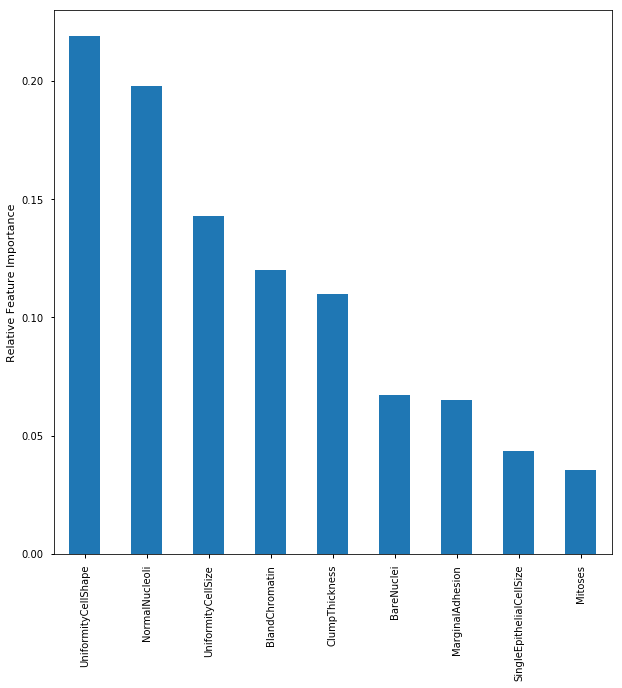

In [119]:
feature_cols = data.columns[1:-1]
feature_importances_plot(rf,feature_cols)


## ROC Curve for the Test Data

Area Under Roc curve :  0.974709501025


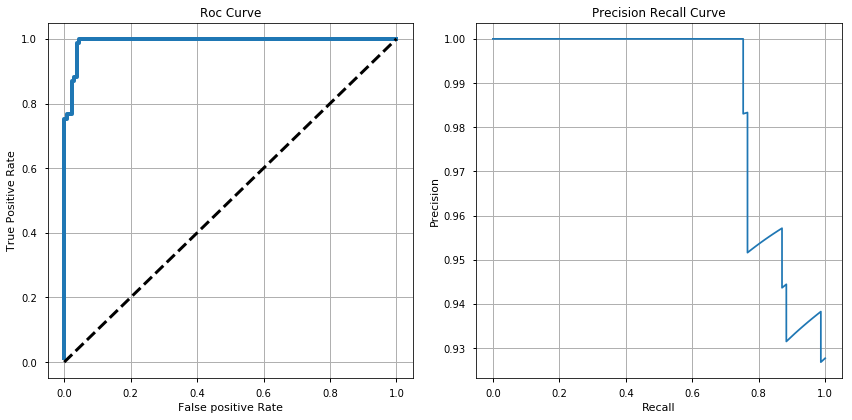

In [72]:

plot_roc_curve(Y_test,yprob[:,1])
print("Area Under Roc curve : ", roc_auc_score(ytest_copy,rf.predict(X_test)) )

## Confusion Matrix report

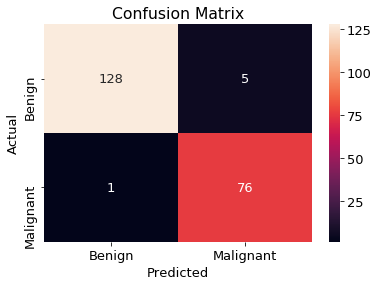

In [213]:

ypred = rf.predict(X_test)
plot_confusion_matrix(Y_test,ypred)
